<a href="https://colab.research.google.com/github/huynhhoanghuy/MS_deeplearning_project_MNIST/blob/main/Recognition_MNIST_21C11011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thông tin học viên:
MSHV: 21C11011

Họ Tên: Huỳnh Hoàng Huy


---



Để có thể có kết quả không đổi sau mỗi lần chạy lại (reproducible results), em thực hiện việc set random seed và train trên CPU.

In [526]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from keras.initializers import constant
from tensorflow.keras.utils import to_categorical



In [527]:
# Seed value
seed_value= 11011

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
import tensorflow.keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

Load dataset

In [528]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [529]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert dataframe to numpy.

In [530]:
mnist.data = mnist.data.to_numpy()
mnist.data.shape

(70000, 784)

In [531]:
mnist.data[0].shape

(784,)

Xem thử 1 ảnh

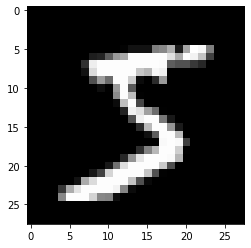

In [532]:
import matplotlib.pyplot as plt
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray')

In [533]:
mnist.target[0]

'5'

Split dataset:


*   Chia tập dữ liệu ban đầu thành 2 tập training và testing với tỉ lệ 80:20
*   Chia tập train thành 2 tập là training và validation với tỉ lệ 75:25

=> training : validation : testing = 60 : 20 : 20



In [534]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_val_img, test_img, train_val_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=0.2, random_state=11011, shuffle=True)


In [535]:
train_img, val_img, train_lbl, val_lbl = train_test_split( train_val_img, train_val_lbl, test_size=0.25, random_state=11011, shuffle=True)
train_img.shape

(42000, 784)

In [536]:
print("train_img.shape:",train_img.shape)
print("val_img.shape:",val_img.shape)
print("test_img.shape:",test_img.shape)

train_img.shape: (42000, 784)
val_img.shape: (14000, 784)
test_img.shape: (14000, 784)


Converts vector (n samples, ) to binary matrix (n, 10). Giống one-hot vector.

10 cột tương ứng với xác suất của 10 class trong mỗi sample.

In [537]:
train_onehot_lbl = to_categorical(train_lbl,num_classes=10)
test_onehot_lbl = to_categorical(test_lbl,num_classes=10)
val_onehot_lbl = to_categorical(val_lbl,num_classes=10)

train_onehot_lbl[0:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)


Gán số lượng nodes trong hidden layers (chưa bao gồm bias node).

Tổng cộng 5 layers: Input, Output, 3x Hidden layers. 



In [538]:
from tensorflow.keras import regularizers


In [539]:
#hiden layer nodes
n1 = 300
n2 = 200
n3 = 100

Create model

In [540]:


input_layer = Input(shape=(784,))

hidden_layer_1 = Dense(n1,activation=tf.keras.layers.LeakyReLU(alpha=0.0015), bias_initializer=constant(value=1.))(input_layer)
hidden_layer_2 = Dense(n2,activation=tf.keras.layers.ELU(alpha=0.0001), bias_initializer=constant(value=1.))(hidden_layer_1)
hidden_layer_3 = Dense(n3,activation="sigmoid", bias_initializer=constant(value=1.),kernel_regularizer=regularizers.l1(0.01))(hidden_layer_2)

dense_layer = Dense(10, activation="softmax", bias_initializer=constant(value=1.0))(hidden_layer_3)

model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015), metrics=["accuracy"])



Define checkpoint

In [541]:
# define the checkpoint

filepath = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

Train with training data

In [542]:
history = model.fit(train_img,train_onehot_lbl,validation_data=(val_img,val_onehot_lbl), epochs= 15, batch_size=1024,callbacks=callbacks_list)


Epoch 1/15
41/42 [============================>.] - ETA: 0s - loss: 10.7052 - accuracy: 0.7666
Epoch 1: loss improved from inf to 10.70354, saving model to model.h5
42/42 [==============================] - 3s 54ms/step - loss: 10.7035 - accuracy: 0.7666 - val_loss: 6.1024 - val_accuracy: 0.8954
Epoch 2/15
41/42 [============================>.] - ETA: 0s - loss: 3.6563 - accuracy: 0.9123
Epoch 2: loss improved from 10.70354 to 3.65559, saving model to model.h5
42/42 [==============================] - 2s 49ms/step - loss: 3.6556 - accuracy: 0.9123 - val_loss: 1.7232 - val_accuracy: 0.9266
Epoch 3/15
41/42 [============================>.] - ETA: 0s - loss: 1.1393 - accuracy: 0.9363
Epoch 3: loss improved from 3.65559 to 1.13918, saving model to model.h5
42/42 [==============================] - 5s 131ms/step - loss: 1.1392 - accuracy: 0.9363 - val_loss: 0.7701 - val_accuracy: 0.9301
Epoch 4/15
41/42 [============================>.] - ETA: 0s - loss: 0.5765 - accuracy: 0.9539
Epoch 4: loss 

Vẽ chart để kiểm tra vấn đề underfit và overfit. Qua chart bên dưới ta thấy training tốt

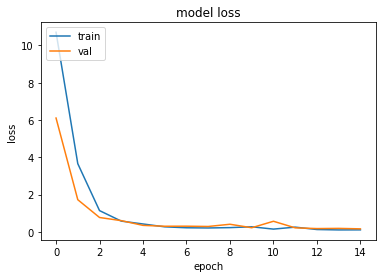

In [543]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show summary

In [544]:
model.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_184 (Dense)           (None, 300)               235500    
                                                                 
 dense_185 (Dense)           (None, 200)               60200     
                                                                 
 dense_186 (Dense)           (None, 100)               20100     
                                                                 
 dense_187 (Dense)           (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________



Sử dụng pre-train weight để train tiếp với tập (training + validation) dataset

In [545]:
train_val_onehot_lbl = to_categorical(train_val_lbl,num_classes=10)

In [546]:
# load the model
new_model = tf.keras.models.load_model(filepath)

# fit the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

new_history = new_model.fit(train_val_img,train_val_onehot_lbl,validation_data=None, epochs= 5, batch_size=1024,callbacks=callbacks_list)


Epoch 1/5
55/55 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9878
Epoch 1: loss improved from inf to 0.12712, saving model to model.h5
55/55 [==============================] - 3s 44ms/step - loss: 0.1271 - accuracy: 0.9878
Epoch 2/5
55/55 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9919
Epoch 2: loss improved from 0.12712 to 0.10673, saving model to model.h5
55/55 [==============================] - 2s 42ms/step - loss: 0.1067 - accuracy: 0.9919
Epoch 3/5
54/55 [============================>.] - ETA: 0s - loss: 0.0973 - accuracy: 0.9936
Epoch 3: loss improved from 0.10673 to 0.09762, saving model to model.h5
55/55 [==============================] - 2s 42ms/step - loss: 0.0976 - accuracy: 0.9934
Epoch 4/5
54/55 [============================>.] - ETA: 0s - loss: 0.0965 - accuracy: 0.9946
Epoch 4: loss improved from 0.09762 to 0.09636, saving model to model.h5
55/55 [==============================] - 2s 42ms/step - loss: 0.0964 - accur

Predict all test samples

In [547]:
pred = new_model.predict(test_img)
pred

array([[9.99177039e-01, 2.34327435e-05, 1.88829275e-04, ...,
        1.65897261e-04, 8.24890321e-06, 4.17696756e-05],
       [4.95399036e-05, 3.77063232e-04, 3.54464486e-04, ...,
        9.97758508e-01, 1.24647568e-05, 3.34662182e-04],
       [2.22574541e-04, 3.35676334e-04, 7.56283271e-06, ...,
        4.70515166e-04, 4.98942158e-04, 9.94603693e-01],
       ...,
       [3.23652857e-05, 2.03167569e-04, 4.44739970e-04, ...,
        2.02775205e-04, 9.95153427e-01, 9.86497384e-04],
       [6.16183461e-05, 2.07132791e-04, 8.70153326e-06, ...,
        3.66319611e-04, 5.95456222e-04, 9.97164547e-01],
       [9.98739064e-01, 1.64155499e-05, 3.65963031e-04, ...,
        8.33702870e-05, 4.46249396e-05, 1.08578046e-04]], dtype=float32)

Compute accuracy on test samples

In [548]:
np.sum(np.argmax(pred,axis=1) == np.argmax(test_onehot_lbl,axis=1))/len(test_onehot_lbl)

0.9802857142857143

=> Accuracy: 0.9802857142857143

Kết thúc!

---




